In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import statsmodels.regression.linear_model as sm

In [193]:
!wget https://raw.githubusercontent.com/maulairfani/DataScience-Learning-Notebooks/main/sales_detail.csv

--2023-02-19 00:57:42--  https://raw.githubusercontent.com/maulairfani/DataScience-Learning-Notebooks/main/sales_detail.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5726815 (5.5M) [text/plain]
Saving to: ‘sales_detail.csv.5’

sales_detail.csv.5  100%[===================>]   5.46M  --.-KB/s    in 0.03s   

2023-02-19 00:57:42 (207 MB/s) - ‘sales_detail.csv.5’ saved [5726815/5726815]



In [194]:
df = pd.read_csv("sales_detail.csv")
df.head()

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value
0,8-Aug-20,JAK0211.58.20200808.0094,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
1,24-Aug-20,JAK0211.58.20200824.0079,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
2,6-Sep-20,JAK0211.58.20200906.0031,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
3,1-Jun-20,JAK0211.58.20200601.0020,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000
4,1-Jun-20,JAK0211.58.20200601.0022,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          44693 non-null  object
 1   Receiveno     44693 non-null  object
 2   Hour          44693 non-null  int64 
 3   Dept          44693 non-null  object
 4   Category      44693 non-null  object
 5   Sub Category  44693 non-null  object
 6   Type Product  44693 non-null  object
 7   Product Name  44693 non-null  object
 8   Qty           44693 non-null  int64 
 9   Price         44693 non-null  int64 
 10  Value         44693 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [196]:
round(df.describe(), 2)

,Hour,Qty,Price,Value
count,44693.00,44693.00,44693.00,44693.00
mean,13.82,1.21,10726.40,12574.13
std,4.36,0.81,9385.84,13529.78
min,4.00,1.00,0.00,0.00
25%,10.00,1.00,5000.00,6000.00
50%,14.00,1.00,7500.00,8500.00
75%,18.00,1.00,13000.00,17000.00
max,23.00,50.00,304000.00,1210000.00


# Missing Value

In [197]:
df.isna().sum()

Date            0
Receiveno       0
Hour            0
Dept            0
Category        0
Sub Category    0
Type Product    0
Product Name    0
Qty             0
Price           0
Value           0
dtype: int64

In [198]:
# Cek nilai unik setiap kolom, lihat apakah ada yang aneh
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

Date
['8-Aug-20' '24-Aug-20' '6-Sep-20' '1-Jun-20' '2-Jun-20' '4-Jun-20'
 '9-Jun-20' '12-Jun-20' '18-Jun-20' '19-Jun-20' '23-Jun-20' '24-Jun-20'
 '25-Jun-20' '24-Jul-20' '25-Jul-20' '26-Jul-20' '27-Jul-20' '2-Aug-20'
 '14-Aug-20' '21-Aug-20' '25-Aug-20' '28-Aug-20' '29-Aug-20' '30-Aug-20'
 '1-Sep-20' '2-Sep-20' '4-Sep-20' '5-Sep-20' '7-Sep-20' '9-Sep-20'
 '13-Sep-20' '17-Sep-20' '18-Sep-20' '20-Sep-20' '22-Sep-20' '25-Sep-20'
 '26-Sep-20' '29-Sep-20' '30-Sep-20' '3-Jun-20' '10-Jun-20' '11-Jun-20'
 '15-Jun-20' '16-Jun-20' '17-Jun-20' '21-Jun-20' '22-Jun-20' '15-Jul-20'
 '16-Jul-20' '17-Jul-20' '18-Jul-20' '19-Jul-20' '20-Jul-20' '21-Jul-20'
 '22-Jul-20' '23-Jul-20' '28-Jul-20' '29-Jul-20' '30-Jul-20' '31-Jul-20'
 '1-Aug-20' '3-Aug-20' '4-Aug-20' '5-Aug-20' '6-Aug-20' '7-Aug-20'
 '9-Aug-20' '10-Aug-20' '11-Aug-20' '13-Aug-20' '15-Aug-20' '16-Aug-20'
 '17-Aug-20' '18-Aug-20' '19-Aug-20' '23-Aug-20' '26-Aug-20' '27-Aug-20'
 '3-Sep-20' '10-Sep-20' '11-Sep-20' '12-Sep-20' '15-Sep-20' '16-Sep

In [199]:
# Ada transaksi yang pricenya 0 = aneh
df[df["Price"] == 0]

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value
12810,15-Jun-20,JAK0211.58.20200615.0015,8,PACKAGED BEVERAGE,PACKAGED BEVERAGE,JUICE RTD,JUICE RTD,MM PULPY ORANGE BTL 300ML,1,0,0
22498,2-Jun-20,JAK0211.58.20200602.0069,9,CONFECTIONARY,CONFECTIONARY,CANDY,CANDY,NANO NANO KULIT JERUK SCH,2,0,0
22499,2-Jun-20,JAK0211.58.20200602.0359,19,CONFECTIONARY,CONFECTIONARY,CANDY,CANDY,NANO NANO KULIT JERUK SCH,1,0,0
28880,22-Jul-20,JAK0211.58.20200722.0050,10,FOOD GROCERY (EXCL CUP NOODLES),FOOD GROCERY (EXCL CUP NOODLES),READY TO COOK,READY TO COOK,INDOMIE GORENG SPECIAL BAG 84GR,1,0,0
36844,1-Jun-20,JAK0211.58.20200601.0213,18,FS BEVERAGES,FS BEVERAGES,FROSTER,ICE BEVERAGE,FROSTER CHOCO 16 OZ,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43637,20-Jun-20,JAK0211.58.20200620.0007,8,FS FOOD,FS FRESH FOOD,STEAM BITE,TAC FOOD,PAO AYAM KARI,1,0,0
43638,22-Jun-20,JAK0211.58.20200622.0129,12,FS FOOD,FS FRESH FOOD,STEAM BITE,TAC FOOD,PAO AYAM KARI,1,0,0
43639,22-Jun-20,JAK0211.58.20200622.0133,12,FS FOOD,FS FRESH FOOD,STEAM BITE,TAC FOOD,PAO AYAM KARI,1,0,0
43646,17-Jul-20,JAK0211.58.20200717.0109,13,FS FOOD,FS FRESH FOOD,STEAM BITE,TAC FOOD,PAO AYAM KARI,1,0,0


In [200]:
# Cek harga asli dari produk yang transaksinya 0
harga_asli = {}
for product in df[df["Price"] == 0]["Product Name"].unique():
    harga = df[(df["Product Name"] == product) & (df["Price"] != 0)].iloc[0]["Price"]
    harga_asli[product] = harga
harga_asli

{'MM PULPY ORANGE BTL 300ML': 6000,
 'NANO NANO KULIT JERUK SCH': 2500,
 'INDOMIE GORENG SPECIAL BAG 84GR': 3000,
 'FROSTER CHOCO 16 OZ': 9500,
 'FROSTER AVOCADO 16 OZ': 9500,
 'FROSTER STRAWBERRY 16 OZ': 9500,
 'FROSTER TROPICAL BLUE 16OZ': 9500,
 'FROSTER CHEESE MILK 12 OZ': 7500,
 'FROSTER CHEESE MILK 16 OZ': 9500,
 'CK COFFEE TIRAMISU 8OZ': 5000,
 'PAO AYAM MERAH': 8500,
 'PAO AYAM RENDANG': 8500,
 'PAO COKELAT': 8500,
 'PAO KACANG MERAH': 8500,
 'PAO KACANG HIJAU': 8500,
 'PAO AYAM KARI': 8500}

In [201]:
# Imputasi yang harganya 0 sesuai dengan harga aslinya
for i in harga_asli.keys():
    idx = df[(df["Price"] == 0) & (df["Product Name"] == i)].index
    df.iloc[idx] = df.iloc[idx].replace(0, harga_asli[i])

In [202]:
df[df["Price"] == 0]

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value


# Outliers

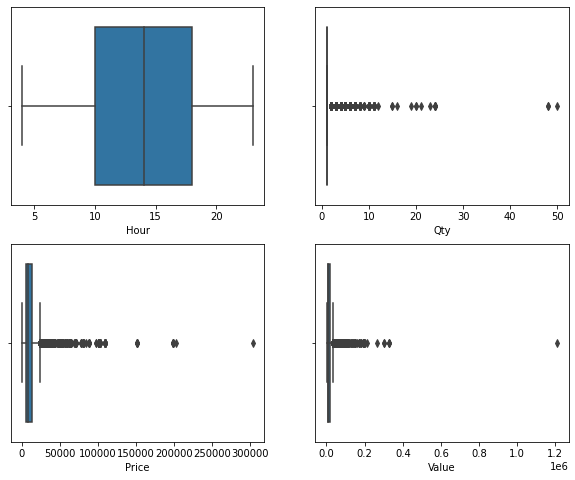

In [203]:
numeric_feature = [feature for feature in df if df[feature].dtype == "int64"]
fig = plt.figure(figsize=(10,8))
for idx, feature in enumerate(numeric_feature):
    plt.subplot(2, 2, idx+1)
    sns.boxplot(data=df, x=feature)
plt.show()

In [204]:
Q1 = df[["Qty", "Price", "Value"]].describe().loc["25%"]
Q3 = df[["Qty", "Price", "Value"]].describe().loc["75%"]

llimit_Qty = Q1["Qty"] - (1.5 * (Q3["Qty"] - Q1["Qty"]))
hlimit_Qty = Q3["Qty"] + (1.5 * (Q3["Qty"] - Q1["Qty"]))

llimit_Price = Q1["Price"] - (1.5 * (Q3["Price"] - Q1["Price"]))
hlimit_Price = Q3["Price"] + (1.5 * (Q3["Price"] - Q1["Price"]))

llimit_Value= Q1["Value"] - (1.5 * (Q3["Value"] - Q1["Value"]))
hlimit_Value = Q3["Value"] + (1.5 * (Q3["Value"] - Q1["Value"]))

In [205]:
# Melihat apakah outlier dipengaruhi oleh tipe produk tertentu
Qty = df["Qty"]
Price = df["Price"]
Value = df["Value"]
print(df[["Type Product", "Qty"]][Qty > hlimit_Qty]["Type Product"].value_counts().head(10), end="\n\n")
print(df[["Type Product", "Price"]][Price > hlimit_Price]["Type Product"].value_counts().head(10), end="\n\n")
print(df[["Type Product", "Value"]][Value > hlimit_Value]["Type Product"].value_counts().head(10), end="\n\n")

CIGARETTE        1065
ICE BEVERAGE     1055
TAC FOOD          602
BOTTLED WATER     565
READY TO COOK     347
TEA RTD           336
ICE CREAM         271
UHT MILK          268
BAKERY            253
CHOCOLATE         202
Name: Type Product, dtype: int64

CIGARETTE         3247
TELEPHONE          276
COOKING            151
GENERAL MD          78
PHARMACEUTICAL      62
FRESH MILK          60
CHOCOLATE           50
VITAMIN             31
CONDOM              28
TAC FOOD            28
Name: Type Product, dtype: int64

CIGARETTE         1006
TELEPHONE          208
TAC FOOD            86
COOKING             75
GENERAL MD          63
ICE CREAM           36
PHARMACEUTICAL      32
ICE BEVERAGE        25
CHOCOLATE           20
BAKERY              17
Name: Type Product, dtype: int64



Outlier pada variabel price dan value didominasi oleh tipe produk cigarette

In [206]:
round(df["Price"].describe(), 2)

count     44693.00
mean      10904.40
std        9269.43
min         500.00
25%        5500.00
50%        8000.00
75%       13000.00
max      304000.00
Name: Price, dtype: float64

In [207]:
round(df[df["Type Product"] == "CIGARETTE"]["Price"].describe(), 2)

count      7530.00
mean      22249.40
std        8395.83
min        9000.00
25%       18500.00
50%       20800.00
75%       25000.00
max      199000.00
Name: Price, dtype: float64

In [213]:
df["Price"].quantile(.895)

22500.0

Rata-rata harga produk cigarette yaitu ~Rp22.500, Sedangkan ~90% Produk yang ada di retail tersebut  harganya di bawah itu. Sehingga produk cigarette dianggap outlier pada data ini.

Namun, harga cigarette sebenarnya masih wajar, sehingga outlier pada data ini dapat dibiarkan saja

In [209]:
df[(df["Type Product"] == "CIGARETTE") & (df["Price"] >= 100000)]["Product Name"].unique()

array(['JUUL ID SLATE DEVICE KIT', 'JUUL PODS ID GLACIER MINT 5%',
       'JUUL PODS ID ROYAL CREME 5%', 'JUUL PODS ID MANGO NECTAR 5%',
       'JUUL PODS ID VIRGINIA TBCO 5%'], dtype=object)

Terdapat juga produk cigarette yang harganya di atas seratus ribu. ternyata produk tersebut adalah cigarette jenis pods, sehingga harganya pun masih wajar

In [210]:
df[(df["Type Product"] == "TELEPHONE") & (df["Price"] >= hlimit_Price)]

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value
33176,2-Jun-20,JAK0211.58.20200602.0338,18,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 50K,1,52000,52000
33177,3-Jun-20,JAK0211.58.20200603.0044,9,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 50K,1,52000,52000
33178,4-Jun-20,JAK0211.58.20200604.0117,13,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 50K,1,52000,52000
33179,4-Jun-20,JAK0211.58.20200604.0158,15,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 50K,1,52000,52000
33180,5-Jun-20,JAK0211.58.20200605.0075,12,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 50K,1,52000,52000
...,...,...,...,...,...,...,...,...,...,...,...
33679,30-Jul-20,JAK0211.58.20200730.0238,21,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,INDOSAT FREEDOM INTERNET 50K,1,54000,54000
33680,28-Sep-20,JAK0211.58.20200928.0043,9,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,INDOSAT FREEDOM INTERNET 75K,1,82000,82000
33698,3-Jun-20,JAK0211.58.20200603.0031,8,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TRI AON 3GB,1,28000,28000
33699,5-Aug-20,JAK0211.58.20200805.0185,15,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TRI AON 3GB,1,28000,28000


Selain produk cigarette, produk telephone juga cukup banyak yang dianggap outlier. Jika dilihat dari harganya, juga masih wajar. Sehingga kesimpulannya outlier di data ini dibiarkan saja

# Redundant Data

In [219]:
df.duplicated().sum()

0

# Data Transformation

- Feature baru `n_prod_1x_transaction` : jumlah produk yang dibeli pada 1 transaksi
- Feature baru `weekday` : transaksi terjadi di hari apa
- Feature baru `nomor_transaksi_1hari` : nomor transaksi pada hari itu
- Feature baru `month` : transaksi terjadi di bulan apa
- Normalisasi (Min-max normalization)
- Membuat variabel dummy (one hot encoding)

## Feature baru `n_prod_1x_transaction` : jumlah produk yang dibeli pada 1 transaksi

In [151]:
map = df["Receiveno"].value_counts().to_dict()
df["n_prod_1x_transaction"] = df["Receiveno"].map(map)
df.head()

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value,n_prod_1x_transaction
0,8-Aug-20,JAK0211.58.20200808.0094,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,4
1,24-Aug-20,JAK0211.58.20200824.0079,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2
2,6-Sep-20,JAK0211.58.20200906.0031,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2
3,1-Jun-20,JAK0211.58.20200601.0020,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1
4,1-Jun-20,JAK0211.58.20200601.0022,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1


## Feature baru `weekday` : transaksi terjadi di hari apa

Monday == 0, Tuesday == 1 … Sunday == 6

In [152]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")
df["weekday"] = df["Date"].dt.weekday
df.head()

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value,n_prod_1x_transaction,weekday
0,2020-08-08,JAK0211.58.20200808.0094,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,4,5
1,2020-08-24,JAK0211.58.20200824.0079,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2,0
2,2020-09-06,JAK0211.58.20200906.0031,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2,6
3,2020-06-01,JAK0211.58.20200601.0020,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1,0
4,2020-06-01,JAK0211.58.20200601.0022,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1,0


## Feature baru nomor_transaksi_1hari : nomor transaksi pada hari itu

In [153]:
df["nomor_transaksi_1hari"] = df["Receiveno"].str[-4:].astype(int)
df.head()

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value,n_prod_1x_transaction,weekday,nomor_transaksi_1hari
0,2020-08-08,JAK0211.58.20200808.0094,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,4,5,94
1,2020-08-24,JAK0211.58.20200824.0079,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2,0,79
2,2020-09-06,JAK0211.58.20200906.0031,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2,6,31
3,2020-06-01,JAK0211.58.20200601.0020,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1,0,20
4,2020-06-01,JAK0211.58.20200601.0022,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1,0,22


## Feature baru `month` : transaksi terjadi di bulan apa

In [156]:
df["month"] = df["Date"].dt.month
df = df.drop(columns=["Date", "Receiveno"])
df.head()

,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value,n_prod_1x_transaction,weekday,nomor_transaksi_1hari,month
0,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,4,5,94,8
1,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2,0,79,8
2,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,2,6,31,9
3,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1,0,20,6
4,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,1,0,22,6


## Normalisasi (Min-max normalization)

In [158]:
numeric_feature = [col for col in df.columns if df[col].dtypes == 'int64']
try:
    numeric_feature.remove("Price")
    numeric_feature.remove("Qty")
    numeric_feature.remove("Value")
except:
    pass

In [162]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_feature])
df[numeric_feature] = scaler.transform(df[numeric_feature])

In [163]:
df.head()

,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value,n_prod_1x_transaction,weekday,nomor_transaksi_1hari,month
0,0.473684,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,0.130435,0.833333,0.230198,0.666667
1,0.368421,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,0.043478,0.000000,0.193069,0.666667
2,0.315789,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,0.043478,1.000000,0.074257,1.000000
3,0.315789,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,0.000000,0.000000,0.047030,0.000000
4,0.315789,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,0.000000,0.000000,0.051980,0.000000


Variabel Qty, Price, Value tidak di normalisasi karena Price akan dijadikan variabel y.

Sedangkan variabel Qty dan Value dapat di drop saja. karena untuk mendapatkan nilai Value kita tinggal mengalikan Price dengan jumlah produk yang dibeli

## Membuat variabel dummy (one hot encoding)

In [164]:
df_dummies = pd.get_dummies(df)

In [165]:
df_dummies.head()

,Hour,Qty,Price,Value,n_prod_1x_transaction,weekday,nomor_transaksi_1hari,month,Dept_CIGARETTE,Dept_CONFECTIONARY,...,Product Name_YOFORIA ACTIV 8 170ML,Product Name_YOU C-1000 LEMON BTL 140 ML,Product Name_YOU C-1000 LMN WTR BTL 500 ML,Product Name_YOU C-1000 ORANGE BTL 140 ML,Product Name_YOU C-1000 ORANGE WTR BTL 500ML,Product Name_YOU C-1000 VITAMIN APPLE 140 ML,Product Name_YOUVIT DEWASA 7 DAY,Product Name_YUPI GUMMY CANDIES MINI BUR,Product Name_YUPI GUMMY CANDIES STRAWBER,Product Name_ZIPPO LIGHTER FLUID - 125 ML
0,0.473684,1,15000,15000,0.130435,0.833333,0.230198,0.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.368421,1,15000,15000,0.043478,0.000000,0.193069,0.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.315789,1,15000,15000,0.043478,1.000000,0.074257,1.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.315789,1,19000,19000,0.000000,0.000000,0.047030,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.315789,1,19000,19000,0.000000,0.000000,0.051980,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df_dummies.shape

(44693, 1321)

# Feature Selection & Dimensionality Reduction
- Forward Selection
- Principal Component Analysis (PCA)

## Forward Selection

In [167]:
X = df_dummies.drop(columns=["Price", "Qty", "Value"])
y = df_dummies["Price"]

In [169]:
lreg = LinearRegression()
sfs = SFS(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [170]:
sfs = sfs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1318 out of 1318 | elapsed:   27.5s finished

[2023-02-19 00:22:51] Features: 1/10 -- score: -91604212.46533385[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1317 out of 1317 | elapsed:  1.3min finished

[2023-02-19 00:24:10] Features: 2/10 -- score: -83744703.03889613[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1316 out of 1316 | elapsed:  1.7min finished

[2023-02-19 00:25:54] Features: 3/10 -- score: -80311628.706543[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [171]:
sfs.k_feature_names_

('Dept_CIGARETTE',
 'Dept_CONFECTIONARY',
 'Dept_FS BAKERY',
 'Dept_GENERAL MD',
 'Dept_PACKAGED BEVERAGE',
 'Dept_SNACK',
 'Category_FS BEVERAGES',
 'Sub Category_READY TO COOK',
 'Sub Category_STEAM BITE',
 'Sub Category_UHT MILK')

In [175]:
selected_data = df_dummies[[
    'Dept_CIGARETTE',
    'Dept_CONFECTIONARY',
    'Dept_FS BAKERY',
    'Dept_GENERAL MD',
    'Dept_PACKAGED BEVERAGE',
    'Dept_SNACK',
    'Category_FS BEVERAGES',
    'Sub Category_READY TO COOK',
    'Sub Category_STEAM BITE',
    'Sub Category_UHT MILK'
]]
selected_data.head()

,Dept_CIGARETTE,Dept_CONFECTIONARY,Dept_FS BAKERY,Dept_GENERAL MD,Dept_PACKAGED BEVERAGE,Dept_SNACK,Category_FS BEVERAGES,Sub Category_READY TO COOK,Sub Category_STEAM BITE,Sub Category_UHT MILK
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [178]:
ols = sm.OLS(endog = y, exog = selected_data).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              6523.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                        0.00
Time:                        00:46:10   Log-Likelihood:                     -4.7096e+05
No. Observations:               44693   AIC:                                  9.419e+05
Df Residuals:                   44683   BIC:                                  9.420e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## PCA

In [179]:
for i in range(1, 10):
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X)
    ols = sm.OLS(endog = y, exog = X_pca).fit()
    print(f"N component: {i}, Adj. R-Squared: {ols.rsquared_adj}")

N component: 1, Adj. R-Squared: 0.12297514651828623
N component: 2, Adj. R-Squared: 0.14335062307213353
N component: 3, Adj. R-Squared: 0.14349503581512746
N component: 4, Adj. R-Squared: 0.14408237601581197
N component: 5, Adj. R-Squared: 0.1442884882633625
N component: 6, Adj. R-Squared: 0.14457729274318198
N component: 7, Adj. R-Squared: 0.14468340612386255
N component: 8, Adj. R-Squared: 0.14466631333306934
N component: 9, Adj. R-Squared: 0.14473823935824004


Dilihat dari nilai Adj. R-Squarednya, reduksi data menggunakan forward selection memiliki performa yang lebih baik daripada PCA, sehingga kita dapat menggunakan hasil dari reduksi data menggunakan forward selection sebagai hasil akhir dari preprocessing ini

In [218]:
# Data hasil preprocessing
selected_data.head()

,Dept_CIGARETTE,Dept_CONFECTIONARY,Dept_FS BAKERY,Dept_GENERAL MD,Dept_PACKAGED BEVERAGE,Dept_SNACK,Category_FS BEVERAGES,Sub Category_READY TO COOK,Sub Category_STEAM BITE,Sub Category_UHT MILK
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
